# Puzzle Solver 🧩

In [37]:
# Don't worry about it it just used for easier coding:
import os
import glob 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import re

In [38]:
# path of dataset change with your own path
folder_path = r"C:\Users\hashe\Desktop\techstack2025-ai\week1\task\images_part2\Puzzle_2_160"

In [39]:
#Read Images
output_file = os.path.join(folder_path, "Output.tif")
patch_files = glob.glob(os.path.join(folder_path, "Patch_*.tif"))

corners_img = np.array(Image.open(output_file))
# Get copy of image to edit it later
base_img = corners_img.copy()

patches = [np.array(Image.open(patch_file)) for patch_file in patch_files]

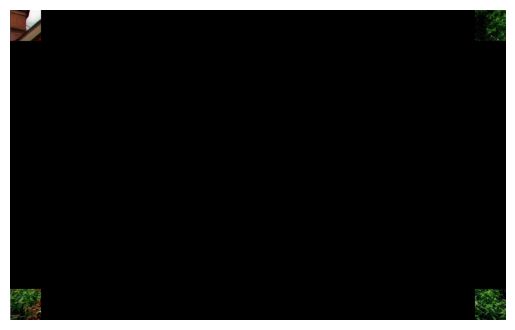

In [40]:
plt.imshow(base_img)
plt.axis('off')
plt.show()

In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time
import numpy as np

def calculate_ncc(edge1, edge2):
    if edge1.shape != edge2.shape:
        return -1

    edge1 = edge1.astype('float')
    edge2 = edge2.astype('float')
    
    edge1_mean = np.mean(edge1)
    edge2_mean = np.mean(edge2)
    
    edge1_norm = edge1 - edge1_mean
    edge2_norm = edge2 - edge2_mean
    
    numerator = np.sum(edge1_norm * edge2_norm)
    denominator = np.sqrt(np.sum(edge1_norm**2) * np.sum(edge2_norm**2))
    
    if denominator == 0:
        return 0
        
    return numerator / denominator

def puzzle_solver():
    final_img = base_img.copy()
    
    patch_height, patch_width, _ = patches[0].shape
    img_height, img_width, _ = base_img.shape
    rows = img_height // patch_height
    cols = img_width // patch_width
    
    patches_to_use = list(patches)
    puzzle_grid = np.full((rows, cols), None, dtype=object)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title("Puzzle Assembly Process (Improved)")
    ax.axis('off')
    im = ax.imshow(final_img)
    display(fig)
    
    for row in range(rows):
        for col in range(cols):
            if (row == 0 or row == rows - 1) and (col == 0 or col == cols - 1):
                puzzle_grid[row, col] = base_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width]
                continue

            best_match_score = -float('inf') 
            best_match_patch = None
            best_match_index = -1
            
            for i, patch in enumerate(patches_to_use):
                if patch is None:
                    continue
                
                for rotation in range(4):
                    rotated_patch = np.rot90(patch, k=rotation)
                    
                    match_score_sum = 0
                    comparisons = 0
                    
                    if row > 0 and puzzle_grid[row-1, col] is not None:
                        top_patch_bottom_edge = puzzle_grid[row-1, col][-1, :, :]
                        current_patch_top_edge = rotated_patch[0, :, :]
                        match_score_sum += calculate_ncc(top_patch_bottom_edge, current_patch_top_edge)
                        comparisons += 1
                    
                    if col > 0 and puzzle_grid[row, col-1] is not None:
                        left_patch_right_edge = puzzle_grid[row, col-1][:, -1, :]
                        current_patch_left_edge = rotated_patch[:, 0, :]
                        match_score_sum += calculate_ncc(left_patch_right_edge, current_patch_left_edge)
                        comparisons += 1
                        
                    if comparisons == 0:
                        continue
                        
                    avg_match_score = match_score_sum / comparisons
                    
                    if avg_match_score > best_match_score:
                        best_match_score = avg_match_score
                        best_match_patch = rotated_patch
                        best_match_index = i
            
            if best_match_patch is not None:
                final_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width] = best_match_patch
                puzzle_grid[row, col] = best_match_patch
                patches_to_use[best_match_index] = None
            
            im.set_data(final_img)
            ax.set_title(f"Placing piece at row {row+1}, col {col+1}")
            display(fig)
            clear_output(wait=True)
            time.sleep(0.01)
            


            
    plt.close(fig)
    print("Puzzle solved!")
    return final_img

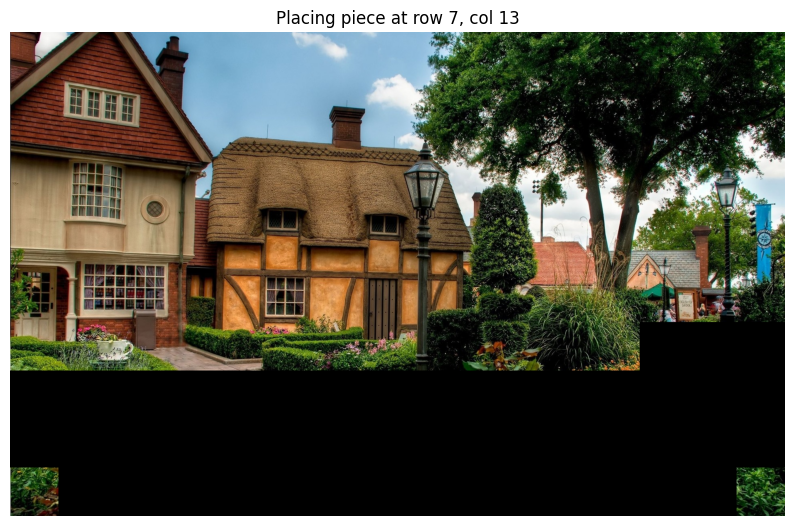

In [ ]:
# Test and Save final Image
final_img = puzzle_solver()
Image.fromarray(final_img).save(os.path.join(folder_path, "final.tif"))

In [ ]:
# Now it's time to find what's our final image good base on original image

# This properties are determined according to the dataset:
rows, cols = 5, 8
img_width, img_height = 1920, 1200
patch_width, patch_height = img_width // cols, img_height // rows

def accuracy_block_base(original_img, final_img, rows, cols):
    correct_blocks = 0
    total_blocks = rows * cols 
    for row in range(rows):
        for col in range(cols):
            patch = final_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width]
            original_patch = original_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width]

            if np.array_equal(patch, original_patch):
                correct_blocks += 1
    
    return 100 * correct_blocks / total_blocks

original_img = np.array(Image.open(os.path.join(folder_path, "Original.tif")))
accuracy = accuracy_block_base(original_img, final_img, rows, cols)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


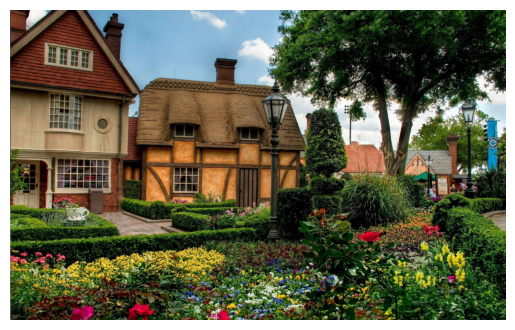

In [ ]:
# show final_img - You can make animation for it while solving puzzle. That's fun!
plt.imshow(final_img)
plt.axis('off') 
plt.show()